In [1]:
#Importing the libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading the data
df_train = pd.read_csv("/Users/navneetkaur/PROJECTS/HACKATHON/af2_dataset_training_labeled.csv.gz",compression='gzip')
df_test = pd.read_csv("/Users/navneetkaur/PROJECTS/HACKATHON/af2_dataset_testset_unlabeled.csv.gz",compression='gzip')

# DATA PREPROCESSING

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497166 entries, 0 to 497165
Data columns (total 51 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           497166 non-null  int64  
 1   annotation_sequence  497166 non-null  object 
 2   feat_A               497166 non-null  bool   
 3   feat_C               497166 non-null  bool   
 4   feat_D               497166 non-null  bool   
 5   feat_E               497166 non-null  bool   
 6   feat_F               497166 non-null  bool   
 7   feat_G               497166 non-null  bool   
 8   feat_H               497166 non-null  bool   
 9   feat_I               497166 non-null  bool   
 10  feat_K               497166 non-null  bool   
 11  feat_L               497166 non-null  bool   
 12  feat_M               497166 non-null  bool   
 13  feat_N               497166 non-null  bool   
 14  feat_P               497166 non-null  bool   
 15  feat_Q           

In [4]:
#ANALYSING THE DATA BY LOOKING AT VARIOUS COLUMNS 

In [5]:
df_train[['annotation_sequence','annotation_atomrec']].head()

,annotation_sequence,annotation_atomrec
0,M,M
1,G,G
2,Q,Q
3,E,E
4,P,P


In [6]:
df_train.iloc[:,1:23]

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_N,feat_P,feat_Q,feat_R,feat_S,feat_T,feat_V,feat_W,feat_Y,annotation_atomrec
0,M,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,M
1,G,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,G
2,Q,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,Q
3,E,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,E
4,P,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497161,S,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,S
497162,H,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,H
497163,G,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,G
497164,G,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,G


In [7]:
df_aminoacids=df_train.iloc[:,2:22]
df_aminoacids['y_Ligand']=df_train['y_Ligand']
df_aminoacids.head()
df_aminoacids=df_aminoacids.astype(int)
result = df_aminoacids[df_aminoacids['y_Ligand'] == True]
result_false=df_aminoacids[df_aminoacids['y_Ligand'] == False]
result
t=result.drop('y_Ligand',axis=1)

In [8]:
#ANALYSING WHICH ROWS ARE GIVING FALSE RESULTS

In [9]:
result_false=df_aminoacids[df_aminoacids['y_Ligand'] == False]
result_false
t=result_false.drop('y_Ligand',axis=1)
row_sum = t.sum(axis=0)
row_sum

feat_A    33015
feat_C     9995
feat_D    24571
feat_E    35577
feat_F    17274
feat_G    30621
feat_H    11803
feat_I    23191
feat_K    29969
feat_L    46397
feat_M    11186
feat_N    18458
feat_P    27697
feat_Q    22405
feat_R    26734
feat_S    37061
feat_T    24945
feat_V    30077
feat_W     5604
feat_Y    13332
dtype: int64

In [10]:
# GENERAL LOOKING AT THE DATA

In [11]:
df_train.describe()

,Unnamed: 0,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry_index
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,4.971660e+05,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,535.495128,-1.162007,0.780075,-0.108342,1.854782,16.746550,5.209644e+01,75.733749,-1.789849,-1.160675,1.754382,-1.140480,-0.053135,-0.177757,0.128386,-0.201625,-3.927826,1.956133,-1.099622,535.495128
std,665.740408,1.039634,1.520499,1.833996,0.469940,18.494097,4.792873e+01,26.971019,58.176800,1.058466,60.429611,1.062049,57.906105,0.156652,61.219479,0.232904,25.770530,20.641283,26.637590,665.740408
min,0.000000,-3.141557,-3.141564,-3.141578,0.000000,0.000000,-2.842171e-14,0.000000,-2281.000000,-4.000000,-2281.000000,-4.000000,-2280.000000,-1.800000,-2281.000000,-2.900000,-149.393997,-114.931000,-152.839005,0.000000
25%,172.000000,-1.686451,-0.654101,-2.067246,1.590771,1.239801,5.274057e+00,55.360000,-4.000000,-2.200000,-1.000000,-2.200000,-2.000000,-0.200000,-2.000000,-0.200000,-18.850000,-9.518750,-16.964001,172.000000
50%,365.000000,-1.199133,0.241335,0.775206,1.756220,8.788650,4.352778e+01,89.530000,-2.000000,-0.700000,2.000000,-0.600000,1.000000,-0.200000,-1.000000,-0.200000,-2.881000,1.206000,-0.681000,365.000000
75%,667.000000,-1.047934,2.297116,0.966645,2.122055,29.958422,8.623462e+01,95.960000,0.000000,-0.200000,4.000000,-0.200000,2.000000,-0.100000,2.000000,-0.100000,11.469000,13.148000,14.147000,667.000000
max,7384.000000,3.141575,3.141584,3.141568,3.137176,99.338342,2.200520e+02,98.980000,2281.000000,0.000000,2281.000000,0.000000,2281.000000,0.000000,2282.000000,0.000000,162.250000,103.135002,176.059998,7384.000000


array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'feat_PHI'}>,
        <AxesSubplot: title={'center': 'feat_PSI'}>,
        <AxesSubplot: title={'center': 'feat_TAU'}>],
       [<AxesSubplot: title={'center': 'feat_THETA'}>,
        <AxesSubplot: title={'center': 'feat_BBSASA'}>,
        <AxesSubplot: title={'center': 'feat_SCSASA'}>,
        <AxesSubplot: title={'center': 'feat_pLDDT'}>],
       [<AxesSubplot: title={'center': 'feat_DSSP_6'}>,
        <AxesSubplot: title={'center': 'feat_DSSP_7'}>,
        <AxesSubplot: title={'center': 'feat_DSSP_8'}>,
        <AxesSubplot: title={'center': 'feat_DSSP_9'}>],
       [<AxesSubplot: title={'center': 'feat_DSSP_10'}>,
        <AxesSubplot: title={'center': 'feat_DSSP_11'}>,
        <AxesSubplot: title={'center': 'feat_DSSP_12'}>,
        <AxesSubplot: title={'center': 'feat_DSSP_13'}>],
       [<AxesSubplot: title={'center': 'coord_X'}>,
        <AxesSubplot: title={'center': 'coord_Y'}>,
    

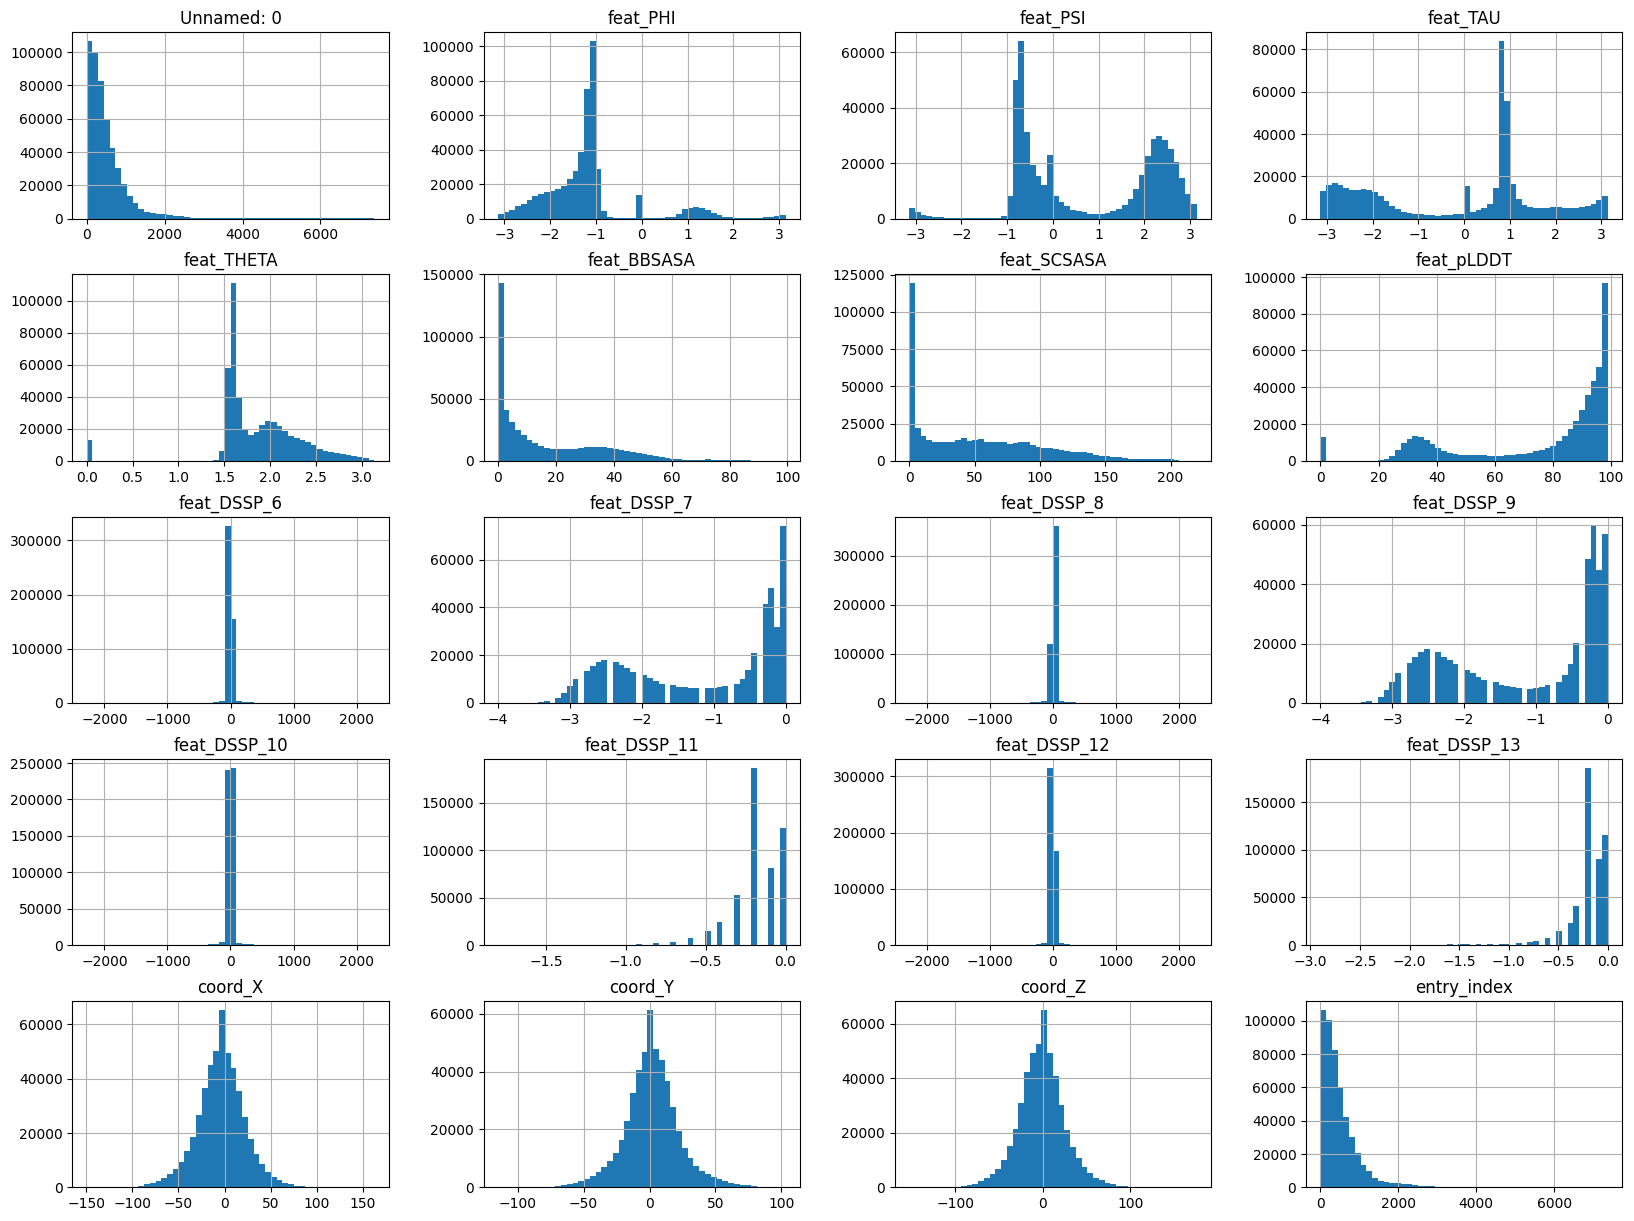

In [12]:
df_train.hist(bins=50, figsize=(20,15))

In [13]:
# performing analysis without the annotation_atomrec
df_train=df_train.drop('Unnamed: 0',axis=1)
df_training=df_train.drop('annotation_sequence',axis=1)


In [14]:
#APPLYING ONE HOT ENCODING

In [15]:
columns_to_encode= cols_to_encode = ['annotation_atomrec','entry',
            'feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F', 'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L','feat_N','feat_M','feat_P',	'feat_Q',	'feat_R','feat_S','feat_T','feat_V','feat_W','feat_Y','feat_DSSP_H','feat_DSSP_B',	'feat_DSSP_E','feat_DSSP_G','feat_DSSP_I','feat_DSSP_T','feat_DSSP_S']
df_encoded = pd.get_dummies(df_training, columns=columns_to_encode)

In [16]:
#SCALING THE DATA

In [17]:
scaler = StandardScaler()
scaled_data=df_encoded
scaler.fit(scaled_data)

StandardScaler()

In [18]:
# Assume X contains the features and y contains the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(columns= ['y_Ligand']), scaled_data['y_Ligand'], test_size=0.2, random_state=42)



# Instantiate a Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Random Forest Classifier accuracy:", accuracy)
# Getting the classification report for insights 
print(classification_report(y_test, y_pred))

#Analyzing the confusion Matrix

print(confusion_matrix(y_test, y_pred))

Random Forest Classifier accuracy: 0.9689039966208741
              precision    recall  f1-score   support

       False       0.97      1.00      0.98     96038
        True       0.87      0.11      0.19      3396

    accuracy                           0.97     99434
   macro avg       0.92      0.55      0.59     99434
weighted avg       0.97      0.97      0.96     99434

[[95983    55]
 [ 3037   359]]


In [19]:
# Perform cross-validation with 5 folds
scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print the accuracy scores for each fold and the mean accuracy score
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96811948 0.96811948 0.96800593 0.96815679 0.96806879]
Mean accuracy: 0.9680940933825635


In [20]:

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)


In [21]:
accuracy

0.9689039966208741

In [22]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model on training data
ada_boost.fit(X_train, y_train)

# Predict on test data
y_pred = ada_boost.predict(X_test)
# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("AdaBoostClassifier accuracy:", accuracy)
# Getting the classification report for insights 
print(classification_report(y_test, y_pred))

#Analyzing the confusion Matrix

print(confusion_matrix(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier accuracy: 0.9657964076673975
              precision    recall  f1-score   support

       False       0.97      1.00      0.98     96038
        True       0.47      0.01      0.03      3396

    accuracy                           0.97     99434
   macro avg       0.72      0.51      0.50     99434
weighted avg       0.95      0.97      0.95     99434

[[95987    51]
 [ 3350    46]]


In [23]:
import xgboost as xgb

# Define the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': 42
}

# Convert training data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=50)

# Convert test data to XGBoost DMatrix format
dtest = xgb.DMatrix(X_test)

# Predict on test data
y_pred = xgb_model.predict(dtest)


In [24]:
# Train your XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      1.00      0.98     96038
        True       0.80      0.14      0.23      3396

    accuracy                           0.97     99434
   macro avg       0.89      0.57      0.61     99434
weighted avg       0.96      0.97      0.96     99434



In [25]:
# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score
print("XGBoost accuracy:", accuracy)
#Analyzing the confusion Matrix

print(confusion_matrix(y_test, y_pred))

XGBoost accuracy: 0.9693666150411329
[[95922   116]
 [ 2930   466]]
